In [43]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Explore data

In [44]:
data = pd.read_csv('breastcancer.csv')
data.head()

,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concavepts_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concavepts_w,symmetry_w,fractaldim_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [45]:
# number of samples in each diagnosis category (benign/malignant)
data.diagnosis.value_counts()

B    357
M    212
Name: diagnosis, dtype: int64

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 32 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              569 non-null    int64  
 1   diagnosis       569 non-null    object 
 2   radius_m        569 non-null    float64
 3   texture_m       569 non-null    float64
 4   perimeter_m     569 non-null    float64
 5   area_m          569 non-null    float64
 6   smoothness_m    569 non-null    float64
 7   compactness_m   569 non-null    float64
 8   concavity_m     569 non-null    float64
 9   concavepts_m    569 non-null    float64
 10  symmetry_m      569 non-null    float64
 11  fractaldim_m    569 non-null    float64
 12  radius_se       569 non-null    float64
 13  texture_se      569 non-null    float64
 14  perimeter_se    569 non-null    float64
 15  area_se         569 non-null    float64
 16  smoothness_se   569 non-null    float64
 17  compactness_se  569 non-null    flo

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'radius_m'}>,
        <AxesSubplot:title={'center':'texture_m'}>,
        <AxesSubplot:title={'center':'perimeter_m'}>,
        <AxesSubplot:title={'center':'area_m'}>,
        <AxesSubplot:title={'center':'smoothness_m'}>],
       [<AxesSubplot:title={'center':'compactness_m'}>,
        <AxesSubplot:title={'center':'concavity_m'}>,
        <AxesSubplot:title={'center':'concavepts_m'}>,
        <AxesSubplot:title={'center':'symmetry_m'}>,
        <AxesSubplot:title={'center':'fractaldim_m'}>,
        <AxesSubplot:title={'center':'radius_se'}>],
       [<AxesSubplot:title={'center':'texture_se'}>,
        <AxesSubplot:title={'center':'perimeter_se'}>,
        <AxesSubplot:title={'center':'area_se'}>,
        <AxesSubplot:title={'center':'smoothness_se'}>,
        <AxesSubplot:title={'center':'compactness_se'}>,
        <AxesSubplot:title={'center':'concavity_se'}>],
       [<AxesSubplot:title={'center':'co

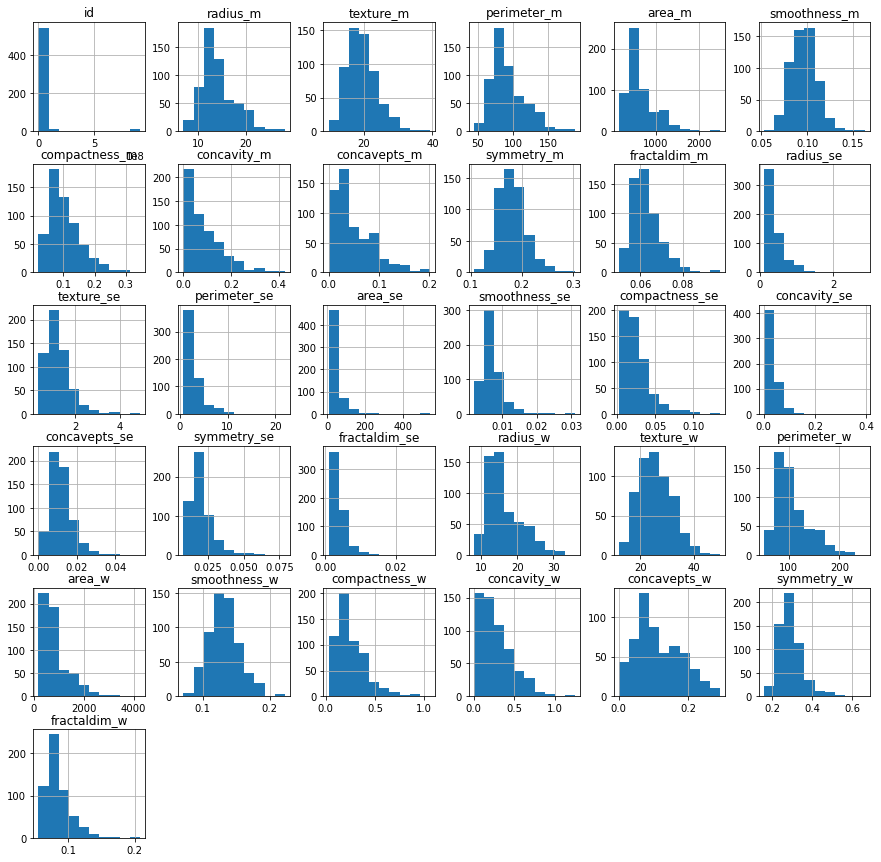

In [47]:
data.hist(figsize=(15,15))

### Generate test and train sets

In [48]:
# randomly sample dataset
test = data.sample(60, random_state=123)
print(test.diagnosis.value_counts())
test.head()

B    34
M    26
Name: diagnosis, dtype: int64


,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concavepts_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concavepts_w,symmetry_w,fractaldim_w
333,897137,B,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,...,12.76,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.016670,0.2815,0.07418
273,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,...,10.75,20.88,68.09,355.2,0.14670,0.09370,0.040430,0.051590,0.2841,0.08175
201,877989,M,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,...,20.42,25.84,139.50,1239.0,0.13810,0.34200,0.350800,0.193900,0.2928,0.07867
178,873357,B,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
85,8612399,M,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,...,22.93,27.68,152.20,1603.0,0.13980,0.20890,0.315700,0.164200,0.3695,0.08579


In [49]:
# test set 
test.to_csv('breastcancer_test.csv', index=False)
pd.read_csv('breastcancer_test.csv')

,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concavepts_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concavepts_w,symmetry_w,fractaldim_w
0,897137,B,11.250,14.78,71.38,390.0,0.08306,0.04458,0.000974,0.002941,...,12.76,22.06,82.08,492.7,0.11660,0.09794,0.005518,0.016670,0.2815,0.07418
1,8910996,B,9.742,15.67,61.50,289.9,0.09037,0.04689,0.011030,0.014070,...,10.75,20.88,68.09,355.2,0.14670,0.09370,0.040430,0.051590,0.2841,0.08175
2,877989,M,17.540,19.32,115.10,951.6,0.08968,0.11980,0.103600,0.074880,...,20.42,25.84,139.50,1239.0,0.13810,0.34200,0.350800,0.193900,0.2928,0.07867
3,873357,B,13.010,22.22,82.01,526.4,0.06251,0.01938,0.001595,0.001852,...,14.00,29.02,88.18,608.8,0.08125,0.03432,0.007977,0.009259,0.2295,0.05843
4,8612399,M,18.460,18.52,121.10,1075.0,0.09874,0.10530,0.133500,0.087950,...,22.93,27.68,152.20,1603.0,0.13980,0.20890,0.315700,0.164200,0.3695,0.08579
5,914862,B,15.040,16.74,98.73,689.4,0.09883,0.13640,0.077210,0.061420,...,16.76,20.43,109.70,856.9,0.11350,0.21760,0.185600,0.101800,0.2177,0.08549
6,8811523,B,11.890,18.35,77.32,432.2,0.09363,0.11540,0.066360,0.031420,...,13.25,27.10,86.20,531.2,0.14050,0.30460,0.280600,0.113800,0.3397,0.08365
7,892189,M,11.760,18.14,75.00,431.1,0.09968,0.05914,0.026850,0.035150,...,13.36,23.39,85.10,553.6,0.11370,0.07974,0.061200,0.071600,0.1978,0.06915
8,8810436,B,15.270,12.91,98.17,725.5,0.08182,0.06230,0.058920,0.031570,...,17.38,15.92,113.70,932.7,0.12220,0.21860,0.296200,0.103500,0.2320,0.07474
9,911366,B,11.620,18.18,76.38,408.8,0.11750,0.14830,0.102000,0.055640,...,13.36,25.40,88.14,528.1,0.17800,0.28780,0.318600,0.141600,0.2660,0.09270


In [50]:
data.drop(test.index, axis=0, inplace=True)
data.reset_index(drop=True, inplace=True)

In [51]:
data

,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concavepts_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concavepts_w,symmetry_w,fractaldim_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
505,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
506,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
507,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [52]:
# train set
data.to_csv('breastcancer_train.csv', index=False)
d = pd.read_csv('breastcancer_train.csv')
d

,id,diagnosis,radius_m,texture_m,perimeter_m,area_m,smoothness_m,compactness_m,concavity_m,concavepts_m,...,radius_w,texture_w,perimeter_w,area_w,smoothness_w,compactness_w,concavity_w,concavepts_w,symmetry_w,fractaldim_w
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
504,926125,M,20.92,25.09,143.00,1347.0,0.10990,0.22360,0.31740,0.14740,...,24.290,29.41,179.10,1819.0,0.14070,0.41860,0.6599,0.2542,0.2929,0.09873
505,926682,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
506,926954,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
507,927241,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


### Plot pairs of features

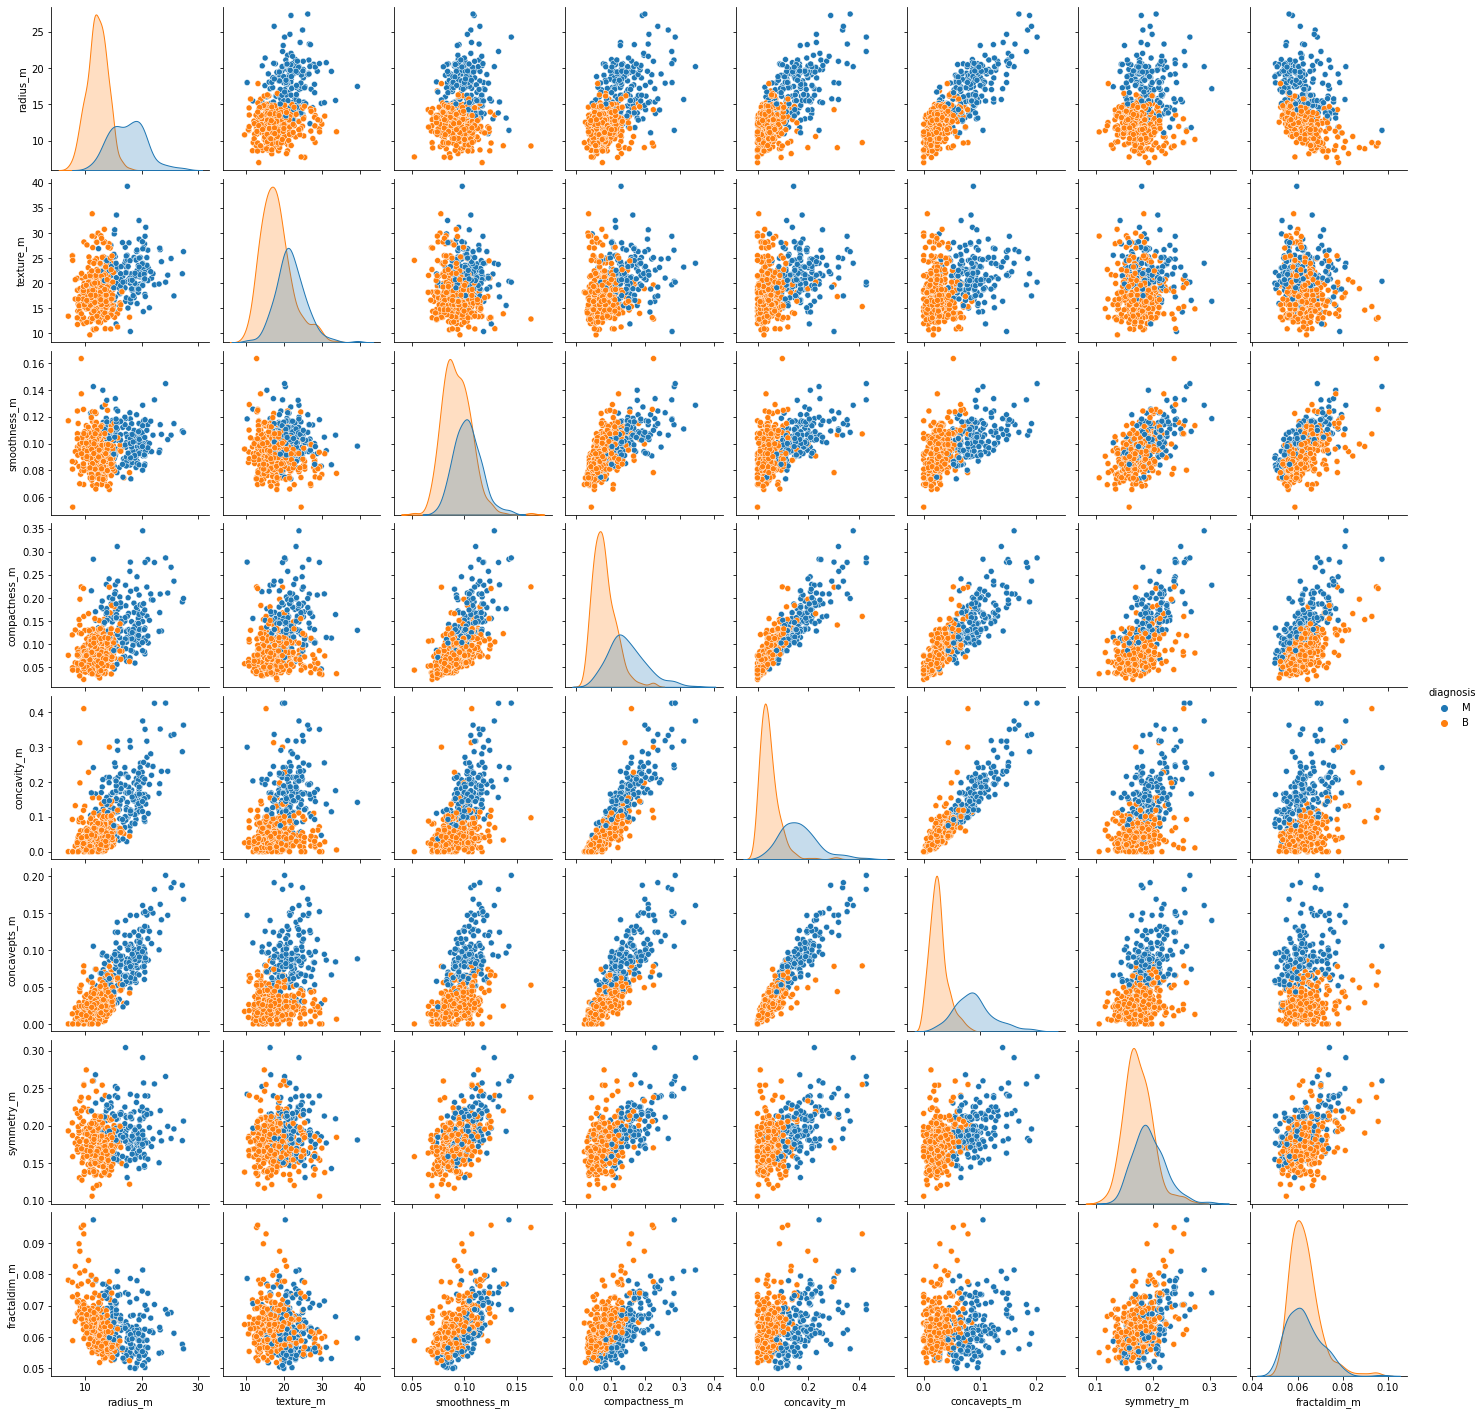

In [53]:
featlist=['radius_m', 'texture_m', 'smoothness_m', 'compactness_m', 'concavity_m', 'concavepts_m', 'symmetry_m', 'fractaldim_m']
sns.pairplot(data=d, vars=featlist, hue='diagnosis')


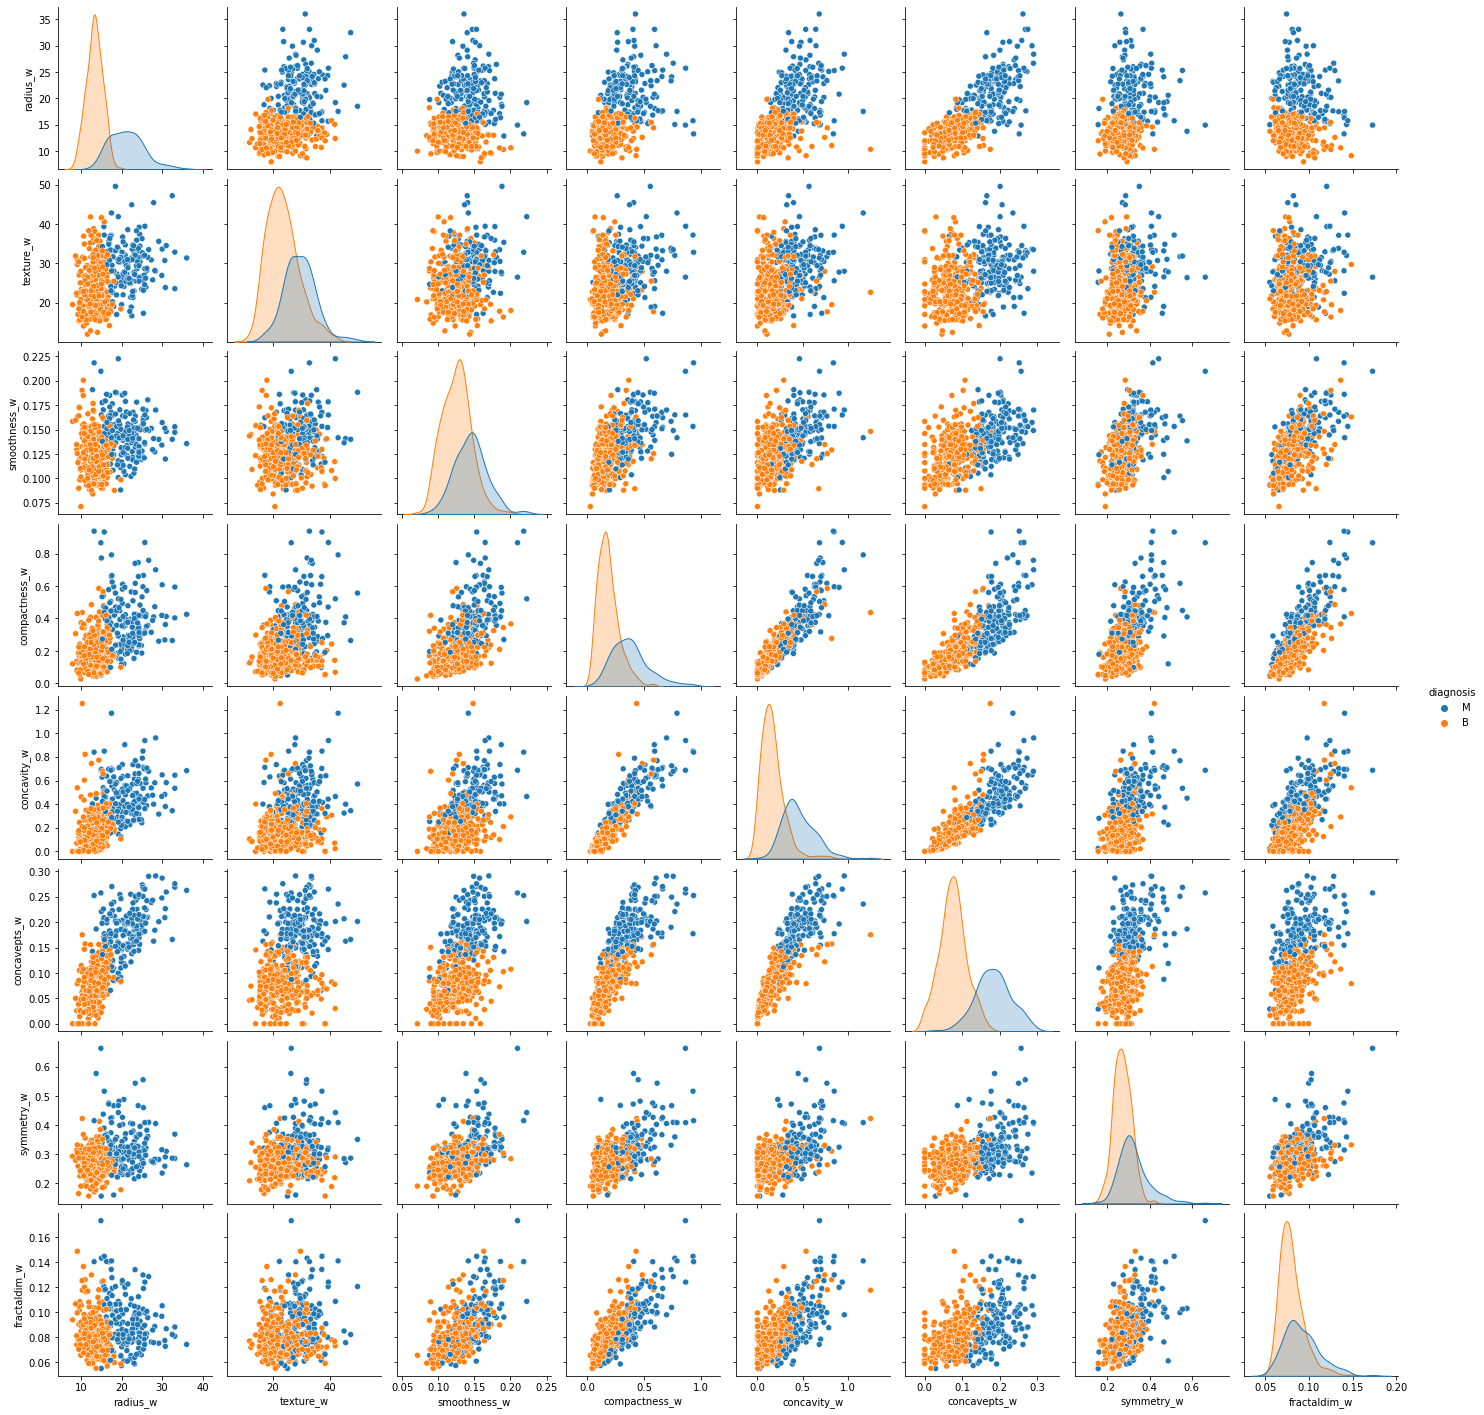

In [54]:
featlist=['radius_w', 'texture_w', 'smoothness_w', 'compactness_w', 'concavity_w', 'concavepts_w', 'symmetry_w', 'fractaldim_w']
sns.pairplot(data=d, vars=featlist, hue='diagnosis')


In [ ]:
featlist=['radius_se', 'texture_se', 'smoothness_se', 'compactness_se', 'concavity_se', 'concavepts_se', 'symmetry_se', 'fractaldim_se']
sns.pairplot(data=d, vars=featlist, hue='diagnosis')
